# Analisis Data TakeMeOut

<pre>
Nama        : Muhammad Alif Putra Yasa
NIM         : 16520301
Universitas : Institut Teknologi Bandung
Data        : TakeMeOut
Pengerjaan  : 6 November 2020
</pre>

## Data Cleaning

Langkah pertama yang dilakukan adalah meng-*import* *library* dan membaca data dari file .csv

In [1]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as spsts
import collections as col

# Membaca Data
data = pd.read_csv('takemeout.csv')

In [2]:
# Melihat data
data.head()

,Timestamp,Siapa nama kamu?,Cewek atau cowok nih?,Seberapa penting quality time bareng calon pacar untuk kamu?,Seberapa penting physical touch sama calon pacar untuk kamu?,Seberapa penting word of affirmation dari calon pacar untuk kamu?,Seberapa penting dapet kado dari calon pacar untuk kamu?,Seberapa penting bantuan dari calon pacar untuk kamu?
0,2020/10/31 3:39:25 PM GMT+7,A**************,Cowok,5,5,4,1,3
1,2020/10/31 3:39:36 PM GMT+7,L****,Cewek,5,5,3,2,2
2,2020/10/31 3:39:38 PM GMT+7,Y***********,Cowok,4,3,4,4,4
3,2020/10/31 3:39:42 PM GMT+7,a***,Cowok,5,5,5,2,3
4,2020/10/31 3:39:43 PM GMT+7,B****,Cowok,5,5,5,2,4


Dapat dilihat berdasarkan contoh data diatas bahwa data berbentuk kualitatif (Nama, Gender, dan Tingkat kepentingan). Tingkat kepentingan termasuk data kualitatif karena mengukur kategori Tidak Penting -- Penting Sekali. Oleh karena itu, tingkat kepentingan dikategorikan sebagai data kualitatif.

Data yang tidak digunakan di analisis, seperti *Timestamp* dan Nama (Semua nama disensor), di hapus atau disingkat.

In [3]:
# Membenahi nama kolom
del data['Timestamp']
column_names = ['Nama', 'Gender', 'Quality Time', 'Physical Touch', 'Affirmation', 'Kado', 'Bantuan']
data.columns = column_names

# Menyingkat Nama
for i in data['Nama']:
    if len(i) > 2:
        data['Nama'] = data['Nama'].replace( i, i[:1] + str(len(i) - 2) + '*')
        
# Memisahkan data cowok dan cewek
cowok_data = data.loc[data['Gender'] == 'Cowok']
cewek_data = data.loc[data['Gender'] == 'Cewek']

In [4]:
data.head()

,Nama,Gender,Quality Time,Physical Touch,Affirmation,Kado,Bantuan
0,A13*,Cowok,5,5,4,1,3
1,L3*,Cewek,5,5,3,2,2
2,Y10*,Cowok,4,3,4,4,4
3,a1*,Cowok,5,5,5,2,3
4,B3*,Cowok,5,5,5,2,4


## Data Analysis

### Statistik Dasar

In [5]:
# Statistik dasar data keseluruhan
sts_dasar = {
    "Max"    : [ np.max(data[kolom]) for kolom in column_names[2:] ],
    "Min"    : [ np.min(data[kolom]) for kolom in column_names[2:] ],
    "Mode"   : [ int(spsts.mode(data[kolom])[0]) for kolom in column_names[2:] ]
}

tabel_sts       = pd.DataFrame(sts_dasar)
tabel_sts.style.set_caption("Hello World")
tabel_sts.index = column_names[2:]
tabel_sts

,Max,Min,Mode
Quality Time,5,1,5
Physical Touch,5,1,3
Affirmation,5,1,4
Kado,5,1,3
Bantuan,5,1,4


In [6]:
# Statistik dasar data cowok
cowok_sts = {
    "Max"    : [ np.max(cowok_data[kolom]) for kolom in column_names[2:] ],
    "Min"    : [ np.min(cowok_data[kolom]) for kolom in column_names[2:] ],
    "Mode"   : [ int(spsts.mode(cowok_data[kolom])[0]) for kolom in column_names[2:] ]
}

tabel_sts_cowok = pd.DataFrame(cowok_sts)
tabel_sts_cowok.index = column_names[2:]
tabel_sts_cowok

,Max,Min,Mode
Quality Time,5,1,5
Physical Touch,5,1,3
Affirmation,5,1,4
Kado,5,1,3
Bantuan,5,1,4


In [7]:
# Statistik dasar data cewek
cewek_sts = {
    "Max"    : [ np.max(cewek_data[kolom]) for kolom in column_names[2:] ],
    "Min"    : [ np.min(cewek_data[kolom]) for kolom in column_names[2:] ],
    "Mode"   : [ int(spsts.mode(cewek_data[kolom])[0]) for kolom in column_names[2:] ]
}

tabel_sts_cewek = pd.DataFrame(cewek_sts)
tabel_sts_cewek.index = column_names[2:]
tabel_sts_cewek

,Max,Min,Mode
Quality Time,5,1,4
Physical Touch,5,1,1
Affirmation,5,1,3
Kado,5,1,1
Bantuan,5,1,5


## Visualisasi Data

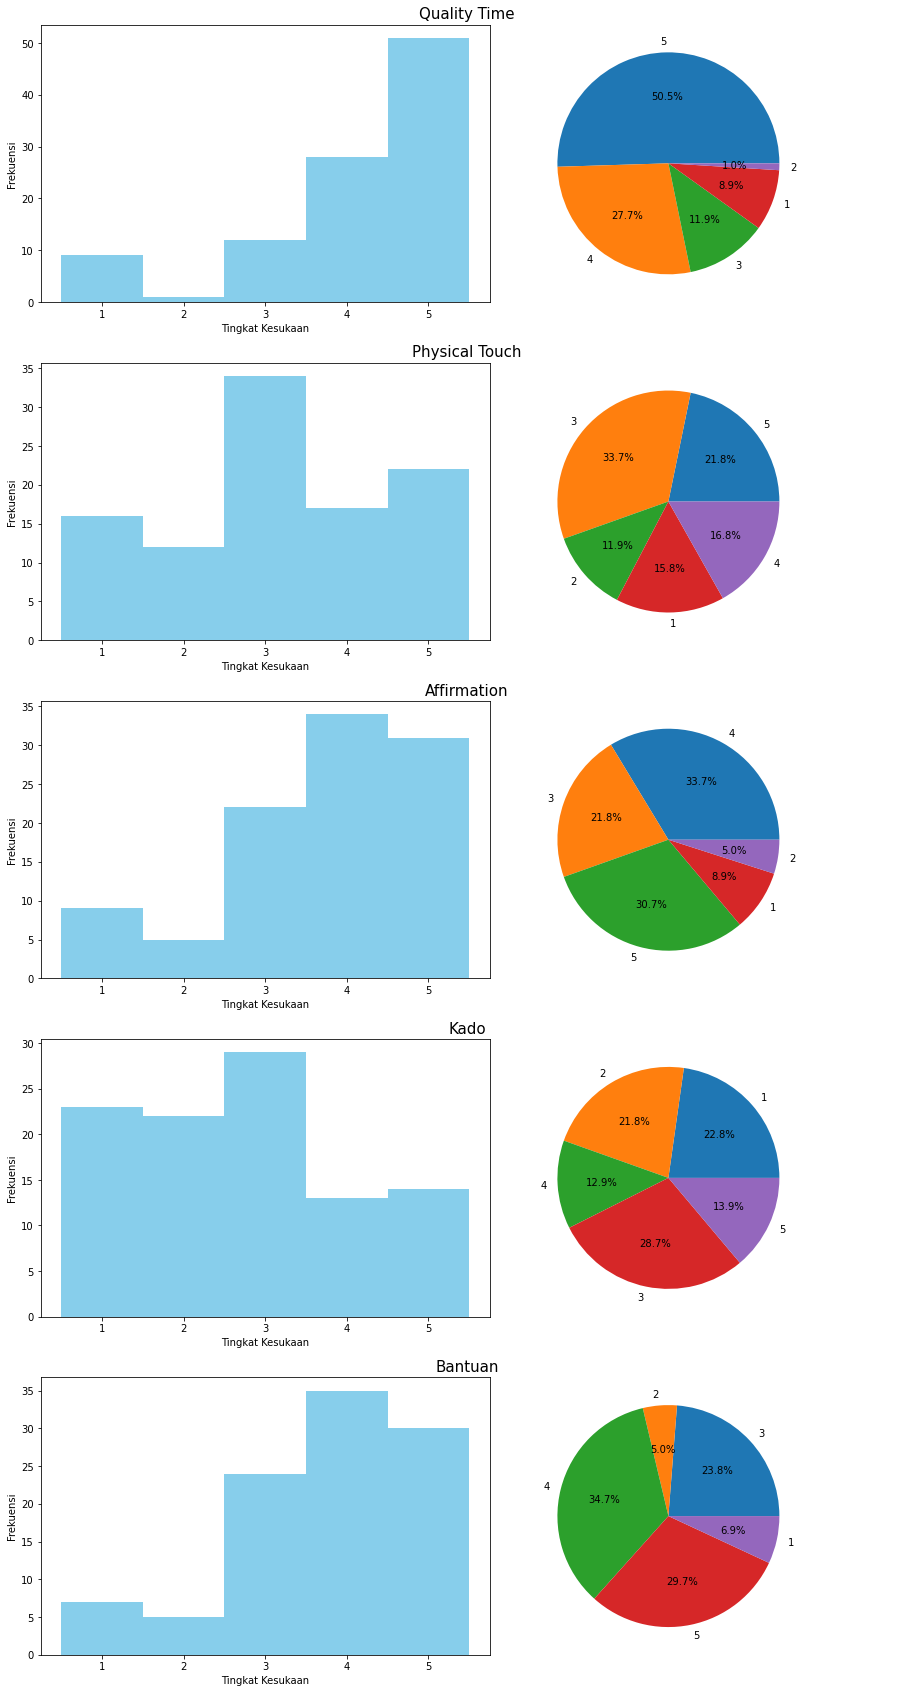

In [8]:
# Mengatur ukuran
plt.rcParams['figure.figsize'] = [2 *10 *1.6 /2.54, 6 *10 /2.54]

#   Untuk membuat judul umum histogram dan pie chart, 
# langkah awal yang dilakukan adalah membuat 5 Grafik

fig, main_axes = plt.subplots(nrows=5, ncols=1, sharey=True)
plt.subplots_adjust(hspace=0.3)

for row, main_ax in enumerate(main_axes, start=1):
    # Memberi nama grafik
    main_ax.set_title(column_names[2:][row-1], fontsize=15)
    # Membuat grafik tidak terlihat
    main_ax.axis('off')

#   Setelah membuat 5 grafik yang tidak terlihat tetapi judulnya
# tetap terlihat, langkah selanjutnya adalah mengisiknya dengan
# histogram dan pie chart
    
# Membuat 10 plot
for i in range(10):
    # Membuat subplot dengan 5 row dan
    # 2 kolom. i + 1 adalah index plot
    sub_ax = fig.add_subplot(5,2,i+1)
    
    # Untuk plot di kiri, histogram
    if i % 2 == 0:
        sub_ax.hist(data[column_names[2:][i//2]],
                bins = np.arange(1,7)-0.5,
                color = 'skyblue')
        plt.setp(sub_ax,
                 xlabel='Tingkat Kesukaan',
                 ylabel = 'Frekuensi')
    
    # Untuk plot di kanan, pie chart
    else:
        sub_ax.pie(list(col.Counter(data[column_names[2:][i//2]]).values()),
               labels=list(col.Counter(data[column_names[2:][i//2]]).keys()),
               autopct='%1.1f%%')

# Supaya ukurannya pas dengan aturan ukuran
plt.tight_layout()

plt.show()